# Prepocessing the dataset

In [1]:
# import packages

import pandas as pd
import numpy as np


In [2]:
# upload the dataset

df = pd.read_excel('Assignment 3.xlsx')

In [3]:
# Adding new dummy variables related to original variables

df['Outlook_Sunny'] = np.where(df['Outlook']=='Sunny', 1, 0)
df['Outlook_OverCast'] = np.where(df['Outlook']=='OverCast', 1, 0)
df['Outlook_Rain'] = np.where(df['Outlook']=='Rain', 1, 0)
df['Humidity_High'] = np.where(df['Humidity']=='Rain', 1, 0)
df['Humidity_Normal'] = np.where(df['Humidity']=='Normal', 1, 0)
df['Wind_Weak'] = np.where(df['Wind']=='Weak', 1, 0)
df['Wind_Strong'] = np.where(df['Wind']=='Strong', 1, 0)
df['Play_Yes'] = np.where(df['Play']== 'Yes',1,0)
df['Play_No'] = np.where(df['Play']== 'No',1,0)

In [4]:
df

,Day,Outlook,Humidity,Wind,Play,Outlook_Sunny,Outlook_OverCast,Outlook_Rain,Humidity_High,Humidity_Normal,Wind_Weak,Wind_Strong,Play_Yes,Play_No
0,D1,Sunny,High,Weak,No,1,0,0,0,0,1,0,0,1
1,D2,Sunny,High,Strong,No,1,0,0,0,0,0,1,0,1
2,D3,OverCast,High,Weak,Yes,0,1,0,0,0,1,0,1,0
3,D4,Rain,High,Weak,Yes,0,0,1,0,0,1,0,1,0
4,D5,Rain,Normal,Weak,Yes,0,0,1,0,1,1,0,1,0
5,D6,Rain,Normal,Strong,No,0,0,1,0,1,0,1,0,1
6,D7,OverCast,Normal,Strong,Yes,0,1,0,0,1,0,1,1,0
7,D8,Sunny,High,Weak,No,1,0,0,0,0,1,0,0,1
8,D9,Sunny,Normal,Weak,Yes,1,0,0,0,1,1,0,1,0
9,D10,Rain,Normal,Weak,Yes,0,0,1,0,1,1,0,1,0


In [5]:
df.shape

(15, 14)

In [6]:
X_train = df.iloc[0:14,5:12]
y_train = df.iloc[0:14,12]
observation = df.iloc[14, 5:12]
print('X_train dimension :',X_train.shape)
print('y_train dimension :',y_train.shape)
print('observation: ', observation.shape)

X_train dimension : (14, 7)
y_train dimension : (14,)
observation:  (7,)


In [7]:
observation

Outlook_Sunny       1
Outlook_OverCast    0
Outlook_Rain        0
Humidity_High       0
Humidity_Normal     1
Wind_Weak           1
Wind_Strong         0
Name: 14, dtype: object

# Decision Tree

In [8]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [9]:
decisiontree = DecisionTreeClassifier(random_state=0)

In [10]:
DT_model = decisiontree.fit(X_train, y_train)
DT_model

DecisionTreeClassifier(random_state=0)

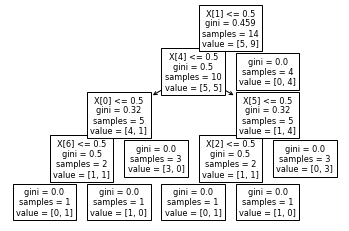

In [11]:
tree.plot_tree(DT_model)
plt.show()

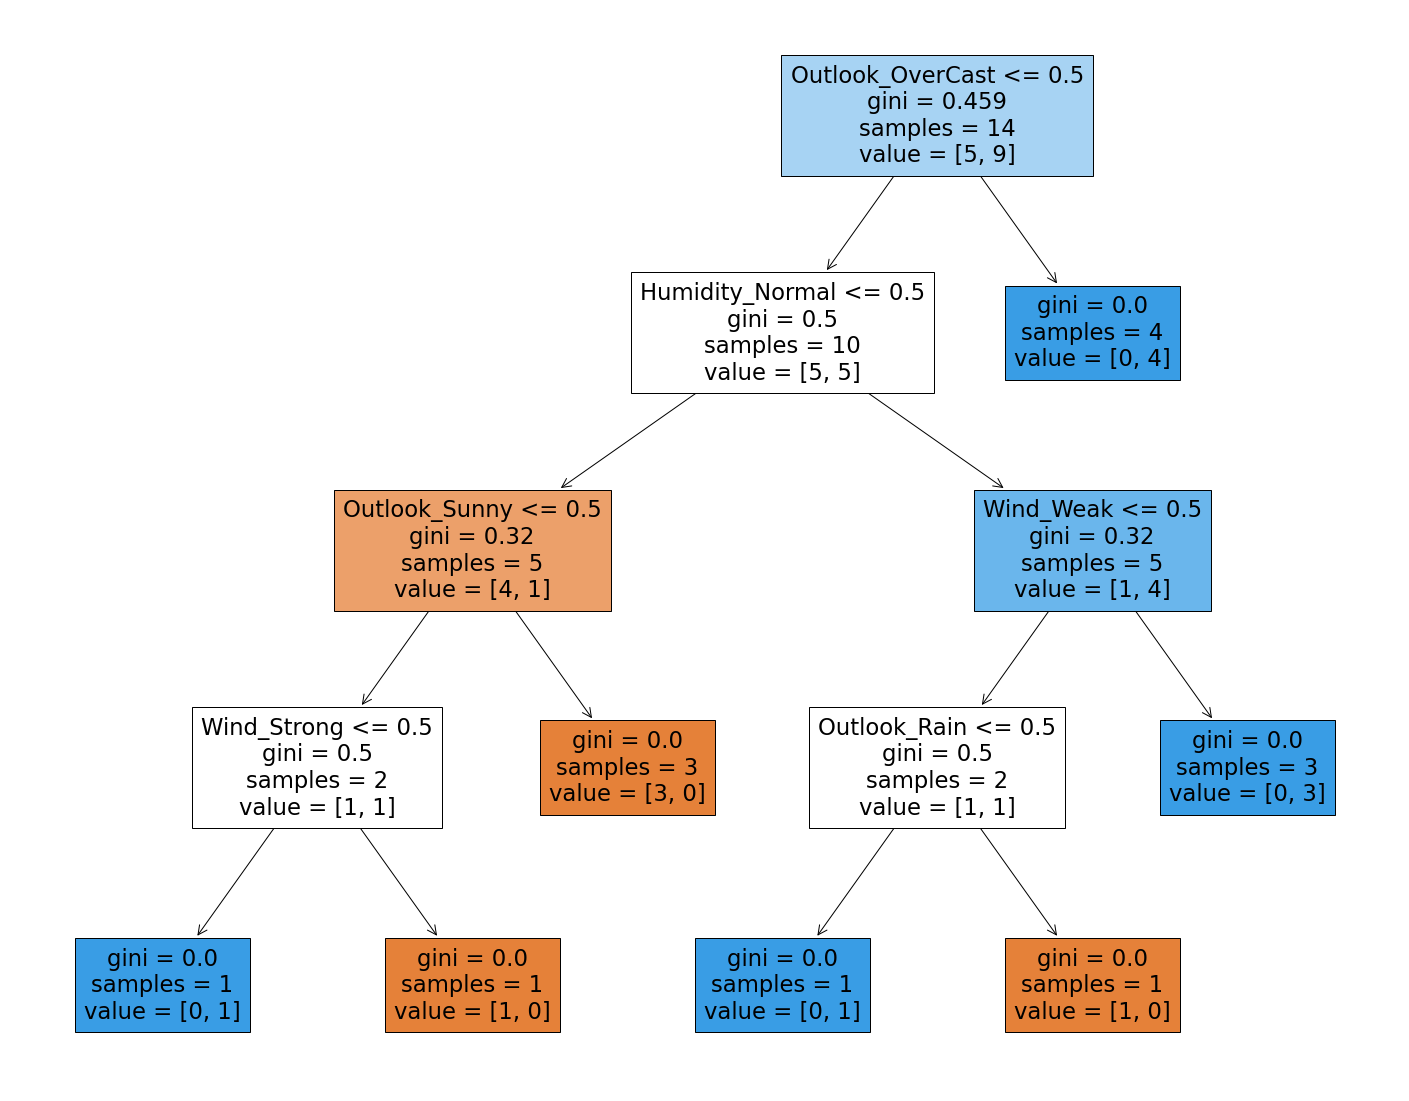

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decisiontree, feature_names=df.columns[5:12],
                   filled=True)

In [12]:
observation = np.array([observation])
DT_model.predict(observation)

C:\Users\daarv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

### The Desicion Tree model predicted result is 1 for 'Play_Yes'.

# Randon Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
RF_model = randomforest.fit(X_train, y_train)
RF_model

RandomForestClassifier(n_jobs=-1, random_state=0)

In [15]:
RF_model.predict(observation)

C:\Users\daarv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

### The Random Forest model predicted as 1 for 'Play_Yes'.

### RandomForestClassifier also uses many of the same parameters as DecisionTree Classifier.